In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns

sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

%matplotlib inline

In [2]:
conn = sqlite3.connect('data.db')
table1 = "test_table"
table2 = "time_cnt"
cmd = f'''
SELECT "{table1}".run_id,monitor_tag,workers,tasks_per_trial,trial,"{table1}".app_name,average_time FROM "{table1}"
JOIN "{table2}"
ON '{table1}'.run_id = '{table2}'.run_id
'''
tasks = pd.read_sql_query(cmd, conn)
tasks

,run_id,monitor_tag,workers,tasks_per_trial,trial,app_name,average_time
0,ee7bd3fa-2518-4b4f-b5fa-336d5f8c856b,htex,1,128,1,noop,0.000115
1,8c86600c-6d64-4bed-b9de-aa5da43fb666,htex,1,128,1,sleep10ms,0.000120
2,09ea21ed-e5be-4288-bbd1-05fec5e31710,htex,1,128,1,sleep100ms,0.000094
3,0d3de61c-30e1-4ef9-a8dc-f00e3082a795,diaspora,1,128,1,noop,0.081337
4,355ed8bd-7433-45d2-82ff-d5563cd406c2,diaspora,1,128,1,sleep10ms,0.068109
...,...,...,...,...,...,...,...
139,9844a590-7fd0-4d54-9cab-4aa7f42f76eb,htex,128,128,3,sleep10ms,0.000048
140,ab1b9e73-503c-481a-827b-de1676e8032c,htex,128,128,3,sleep100ms,0.000063
141,95404a99-0424-481b-8d6e-53ce5481bf6b,diaspora,128,128,3,noop,0.000194
142,bfd42705-3768-40f4-b58a-ef245f78001c,diaspora,128,128,3,sleep10ms,0.000179


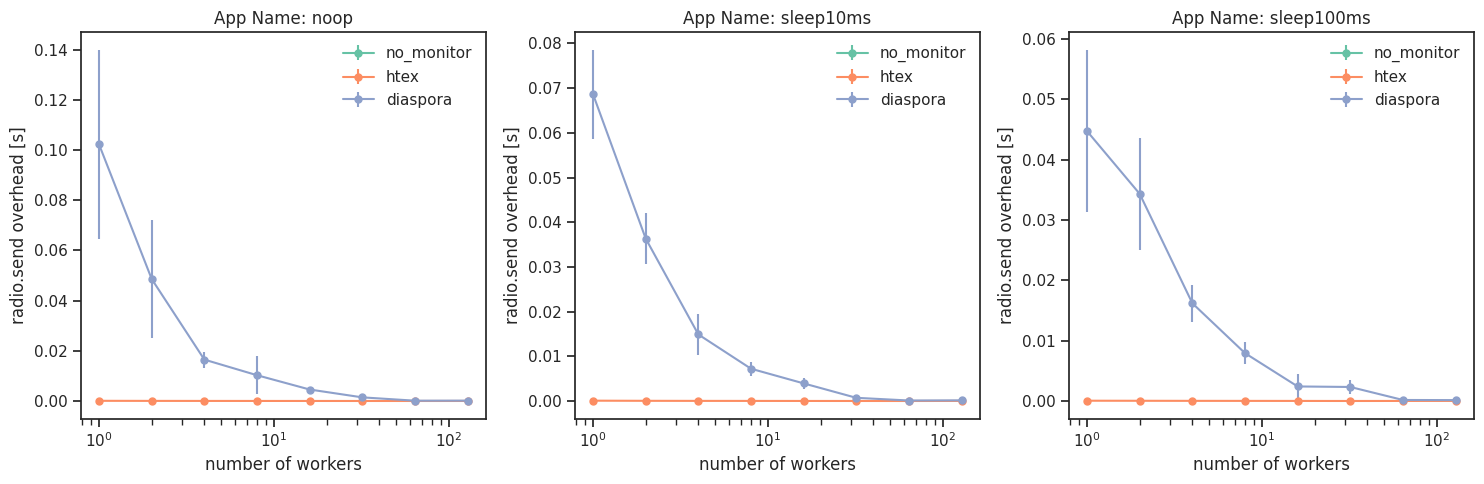

In [3]:
monitor_tags = ['no_monitor', 'htex', 'diaspora']
app_names = ['noop', 'sleep10ms', 'sleep100ms']

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, app_name in enumerate(app_names):
    ax = axs[i]
    for monitor_tag in monitor_tags:
        df = tasks[((tasks['monitor_tag'] == monitor_tag) & (tasks['app_name'] == app_name))]
        df = df.groupby('workers', as_index=False)['average_time']
        means = df.mean()
        standard_deviations = df.std()
        means.plot('workers', 'average_time', marker='o', ms=5, logx=True, yerr=list(standard_deviations['average_time']), label=monitor_tag, ax=ax)
    ax.set_ylabel('radio.send overhead [s]')
    ax.set_xlabel('number of workers')
    ax.legend(frameon=False)
    ax.set_title(f'App Name: {app_name}')

plt.tight_layout()
# plt.savefig(f'{table_name}.pdf')